Exemplo para model lmfit

[3.04548699 0.0288402  9.3371473 ]


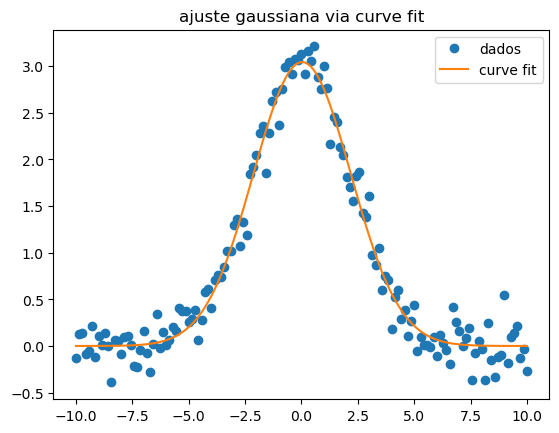

In [107]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from lmfit import Model



def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)


x = np.linspace(-10, 10, 141)
y = gaussian(x,3, 0.0, 9.0) + np.random.normal(0, 0.2, x.size)

init_vals = [22.2, 0.5, 1]  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
print(best_vals)




plt.plot(x,y,'o',label='dados')
plt.plot(x,gaussian(x,best_vals[0],best_vals[1],best_vals[2]),label='curve fit')
plt.title('ajuste gaussiana via curve fit')
plt.legend();



parameter names: ['amp', 'cen', 'wid']
independent variables: ['x']
0.028838994241492662
3.0454863205461966
9.337155448636787
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 78
    # data points      = 141
    # variables        = 3
    chi-square         = 4.53181074
    reduced chi-square = 0.03283921
    Akaike info crit   = -478.707001
    Bayesian info crit = -469.860722
    R-squared          = 0.97150410
[[Variables]]
    amp:  3.04548632 +/- 0.04286529 (1.41%) (init = 1)
    cen:  0.02883899 +/- 0.03511732 (121.77%) (init = 1)
    wid:  9.33715545 +/- 0.30351609 (3.25%) (init = 7.25)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = -0.5773


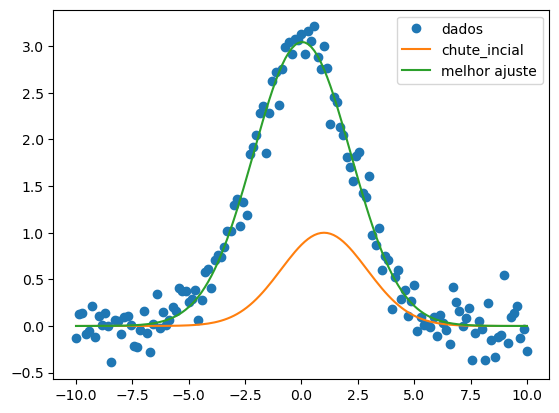

In [109]:
# usando lmfit model
 # definindo modelo
gmodel = Model(gaussian) #define seu modelo como gmodel
print(f'parameter names: {gmodel.param_names}')
print(f'independent variables: {gmodel.independent_vars}')

# ajustando paramentros
params = gmodel.make_params(cen=1, amp=1, wid=7.25) # defini apenas valores iniciais
params['amp'].set(value=0.3, min=1, max=15.0)      # ajusta intervalo

# Fitting
result = gmodel.fit(y, params, x=x)
print(result.params['cen'].value)
print(result.params['amp'].value)
print(result.params['wid'].value)


plt.plot(x,y,'o',label='dados')
plt.plot(x,result.init_fit,label='chute_incial')  #chute inicial do modelo
plt.plot(x,result.best_fit,label='melhor ajuste')  #melhor ajuste do modelo
plt.legend();
print(result.fit_report())




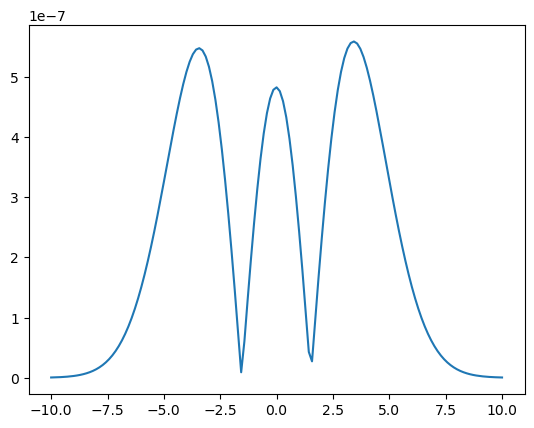

In [104]:
diff=np.abs(result.best_fit-gaussian(x,best_vals[0],best_vals[1],best_vals[2]))

plt.plot(x,diff);